In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data['salary'] = data['salary'].fillna(0)

In [5]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
data.drop('status',axis=1,inplace=True)

In [7]:
data.drop('sl_no',axis=1,inplace=True)

In [8]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0


In [9]:
clmns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for clmn in clmns:
    data[clmn] = le.fit_transform(data[clmn])
data.loc[172]

gender                 1.00
ssc_p                 73.00
ssc_b                  1.00
hsc_p                 58.00
hsc_b                  1.00
hsc_s                  1.00
degree_p              56.00
degree_t               0.00
workex                 0.00
etest_p               84.00
specialisation         1.00
mba_p                 52.64
salary            300000.00
Name: 172, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(data.drop('salary',axis=1),data.salary,test_size=0.2,random_state=42)

In [11]:
y_train.shape

(172,)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score

linreg = LinearRegression()

linreg.fit(x_train,y_train)

# y_pred = linreg.predict(x_test) 
# mse = mean_squared_error(knn_pred,y_test)
# msle = mean_squared_log_error(knn_pred,y_test)
# mae = mean_absolute_error(knn_pred,y_test)
# r2_score = r2_score(knn_pred,y_test)
# # print(mse,msle,mae,r2_score)
# print(lin)

LinearRegression()

In [15]:
print(x_test.shape,y_test.shape)

(43, 12) (43,)


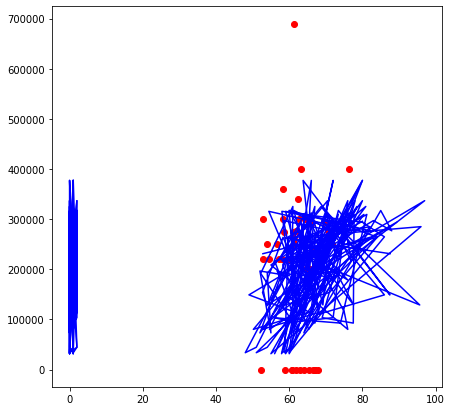

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(x_test.mba_p, y_test, color = 'red')
plt.plot(x_test., linreg.predict(x_test), color = 'blue')
# plt.title('Salary vs Experience (Test set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()

knn_reg.fit(x_train,y_train)

knn_pred = knn_reg.predict(x_test)
mse = mean_squared_error(knn_pred,y_test)
msle = mean_squared_log_error(knn_pred,y_test)
mae = mean_absolute_error(knn_pred,y_test)
# r2_score1 = r2_score(knn_pred,y_test)
print(mse,msle,mae)

23682587906.976746 31.97880389651348 104865.11627906977


In [29]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

xgb_reg.fit(x_train,y_train)

xgb_pred = xgb_reg.predict(x_test)

mse = mean_squared_error(knn_pred,y_test)
msle = mean_squared_log_error(knn_pred,y_test)
mae = mean_absolute_error(knn_pred,y_test)
# r2_score1 = r2_score(knn_pred,y_test)
print(mse,msle,mae)

23682587906.976746 31.97880389651348 104865.11627906977


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train,y_train)

rf_pred = rf_reg.predict(x_test)

mse = mean_squared_error(knn_pred,y_test)
msle = mean_squared_log_error(knn_pred,y_test)
mae = mean_absolute_error(knn_pred,y_test)
# r2_score1 = r2_score(knn_pred,y_test)
print(mse,msle,mae)

23682587906.976746 31.97880389651348 104865.11627906977
